In [1]:
import requests
import json
import numpy as np
import pandas as pd

In [2]:
from config import walkscore_api_key

In [3]:
csv_path = "Project1_AmazonSites.csv"
city_csv = pd.read_csv(csv_path)
# to remove all null values
city_df = city_csv.iloc[:39,:9]
# change zip to only integer
city_df['zip code'] = city_df['zip code'].astype(int)
for index, zip in city_df['zip code'].iteritems():
    if len(str(zip)) == 4:
        city_df['zip code'].iloc[index] = "0"+str(zip)
city_df.head()

C:\Users\hleao\AppData\Local\Continuum\anaconda3\envs\Python\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,amazon city,site,site name,address,city,state,zip code,latitude,longitude
0,Northern Virginia Area,Site1,Center for Innovation Technology,2214 Rock Hill Road,Herndon,VA,20170,38.96,-77.42
1,Northern Virginia Area,Site2,Crystal City and Potomac Yard,3535 S Ball Street,Arlington,VA,22202,38.84,-77.05
2,Washington DC,Site1,Nationals Park/ D.C United Stadium,32-60 R Street,Washington,DC,20024,38.86,-77.01
3,Washington DC,Site2,Union Station,10 G Street,Washington,DC,20002,38.89,-77.00
4,Washington DC,Site3,Hill-East Neighborhood,1430 Pennsylvania Avenue,Washington,DC,20003,38.88,-76.97


In [4]:
city_param = city_df[['latitude', 'longitude', 'address','site name','city','amazon city']]
city_param.head()

,latitude,longitude,address,site name,city,amazon city
0,38.96,-77.42,2214 Rock Hill Road,Center for Innovation Technology,Herndon,Northern Virginia Area
1,38.84,-77.05,3535 S Ball Street,Crystal City and Potomac Yard,Arlington,Northern Virginia Area
2,38.86,-77.01,32-60 R Street,Nationals Park/ D.C United Stadium,Washington,Washington DC
3,38.89,-77.00,10 G Street,Union Station,Washington,Washington DC
4,38.88,-76.97,1430 Pennsylvania Avenue,Hill-East Neighborhood,Washington,Washington DC


In [5]:
base_url = "http://api.walkscore.com/score?"
walkscore_list = []

for city in city_param.values:

    address_decoded = str(city[2]).replace(" ","%20")
    params = f"format=json&address={address_decoded}&lat={city[0]}&lon={city[1]}&transit=1&bike=1&wsapikey={walkscore_api_key}"
    full_url = base_url + params
    walkscore_response = requests.get(full_url)
    walkscore_json = walkscore_response.json()
    
    if 'transit' not in walkscore_json.keys():
        if 'bike' not in walkscore_json.keys():
            walkscore_list.append({'Site Name':city[3],
                     'City':city[4],
                     'Amazon City':city[5],
                     'Description':walkscore_json['description'],
                     'Walk score':walkscore_json['walkscore'],
                     'Transit score':None,
                     'Transit description':None,
                     'Bike score':None,
                     'Bike description':None})
        else:
            walkscore_list.append({'Site Name':city[3],
                     'City':city[4],
                     'Amazon City':city[5],
                     'Description':walkscore_json['description'],
                     'Walk score':walkscore_json['walkscore'],
                     'Transit score':None,
                     'Transit description':None,
                     'Bike score':walkscore_json['bike']['score'],
                     'Bike description':walkscore_json['bike']['description']})
    else:
        try:
            walkscore_list.append({'Site Name':city[3],
                     'City':city[4],
                     'Amazon City':city[5],
                     'Description':walkscore_json['description'],
                     'Walk score':walkscore_json['walkscore'],
                     'Transit score':walkscore_json['transit']['score'],
                     'Transit description':walkscore_json['transit']['description'],
                     'Bike score':walkscore_json['bike']['score'],
                     'Bike description':walkscore_json['bike']['description']})
        except:
            walkscore_list.append({'Site Name':city[3],
                     'City':city[4],
                     'Amazon City':city[5],
                     'Description':walkscore_json['description'],
                     'Walk score':walkscore_json['walkscore'],
                     'Transit score':walkscore_json['transit']['score'],
                     'Transit description':walkscore_json['transit']['description'],
                     'Bike score':None,
                     'Bike description':None})

#Pomona Fairplex and The High Street Site had bike key errors

In [6]:
walkscore_df = pd.DataFrame(walkscore_list)
walkscore_df.head()

,Amazon City,Bike description,Bike score,City,Description,Site Name,Transit description,Transit score,Walk score
0,Northern Virginia Area,None,NaN,Herndon,Car-Dependent,Center for Innovation Technology,None,NaN,43
1,Northern Virginia Area,Very Bikeable,82.0,Arlington,Somewhat Walkable,Crystal City and Potomac Yard,Some Transit,47.0,69
2,Washington DC,Somewhat Bikeable,34.0,Washington,Car-Dependent,Nationals Park/ D.C United Stadium,Good Transit,57.0,22
3,Washington DC,Biker's Paradise,97.0,Washington,Walker's Paradise,Union Station,Excellent Transit,84.0,91
4,Washington DC,Bikeable,58.0,Washington,Car-Dependent,Hill-East Neighborhood,Excellent Transit,71.0,10


In [7]:
walkscore_df = walkscore_df[['Site Name','Amazon City','City','Walk score','Description','Transit score','Transit description','Bike score','Bike description']]
walkscore_df

,Site Name,Amazon City,City,Walk score,Description,Transit score,Transit description,Bike score,Bike description
0,Center for Innovation Technology,Northern Virginia Area,Herndon,43,Car-Dependent,NaN,None,NaN,None
1,Crystal City and Potomac Yard,Northern Virginia Area,Arlington,69,Somewhat Walkable,47.0,Some Transit,82.0,Very Bikeable
2,Nationals Park/ D.C United Stadium,Washington DC,Washington,22,Car-Dependent,57.0,Good Transit,34.0,Somewhat Bikeable
3,Union Station,Washington DC,Washington,91,Walker's Paradise,84.0,Excellent Transit,97.0,Biker's Paradise
4,Hill-East Neighborhood,Washington DC,Washington,10,Car-Dependent,71.0,Excellent Transit,58.0,Bikeable
5,Shaw-Howard University Area,Washington DC,Washington,91,Walker's Paradise,80.0,Excellent Transit,96.0,Biker's Paradise
6,Warner Center West San Fernando Valley,Los Angeles,Woodland Hills,62,Somewhat Walkable,59.0,Good Transit,65.0,Bikeable
7,New Hall Ranch Santa Clarita Valley,Los Angeles,Santa Clarita,67,Somewhat Walkable,NaN,None,NaN,None
8,Pomona Fairplex,Los Angeles,Pomona,17,Car-Dependent,25.0,Some Transit,NaN,None
9,Suffolk Downs,Boston,Boston,64,Somewhat Walkable,60.0,Good Transit,51.0,Bikeable


In [8]:
amazon_city_group = walkscore_df.groupby(['Amazon City'])
amazon_city_group_mean = amazon_city_group[['Walk score', 'Bike score', 'Transit score']].mean()
amazon_city_group_mean


,Walk score,Bike score,Transit score
Amazon City,,,
Atlanta,54.250000,74.00,55.00
Austin,29.571429,49.00,39.00
Boston,69.500000,68.50,76.25
Chicago,76.375000,78.25,81.00
Los Angeles,48.666667,65.00,42.00
New York,86.250000,76.00,95.75
Northern Virginia Area,56.000000,82.00,47.00
Raleigh,32.666667,62.00,73.00
Washington DC,53.500000,71.25,73.00


In [9]:
# 20% of amazon workers walk to work in seattle, 47% transit, 12% bike in seattle in 2017
# https://www.seattletimes.com/seattle-news/transportation/as-jobs-grow-in-downtown-seattle-workers-turn-more-to-transit/
# adding that weight to each 

amazon_city_group_mean['Walk score (Normalized)'] = amazon_city_group_mean['Walk score'].apply(lambda x: x*0.2)
amazon_city_group_mean['Transit score (Normalized)'] = amazon_city_group_mean['Transit score'].apply(lambda x: x*0.47)
amazon_city_group_mean['Bike score (Normalized)'] = amazon_city_group_mean['Bike score'].apply(lambda x: x*0.12)
amazon_city_group_mean

,Walk score,Bike score,Transit score,Walk score (Normalized),Transit score (Normalized),Bike score (Normalized)
Amazon City,,,,,,
Atlanta,54.250000,74.00,55.00,10.850000,25.8500,8.88
Austin,29.571429,49.00,39.00,5.914286,18.3300,5.88
Boston,69.500000,68.50,76.25,13.900000,35.8375,8.22
Chicago,76.375000,78.25,81.00,15.275000,38.0700,9.39
Los Angeles,48.666667,65.00,42.00,9.733333,19.7400,7.80
New York,86.250000,76.00,95.75,17.250000,45.0025,9.12
Northern Virginia Area,56.000000,82.00,47.00,11.200000,22.0900,9.84
Raleigh,32.666667,62.00,73.00,6.533333,34.3100,7.44
Washington DC,53.500000,71.25,73.00,10.700000,34.3100,8.55


In [10]:
amazon_city_group_mean['Score combined'] = amazon_city_group_mean['Bike score (Normalized)']+amazon_city_group_mean['Walk score (Normalized)']+amazon_city_group_mean['Transit score (Normalized)']
amazon_city_group_mean

,Walk score,Bike score,Transit score,Walk score (Normalized),Transit score (Normalized),Bike score (Normalized),Score combined
Amazon City,,,,,,,
Atlanta,54.250000,74.00,55.00,10.850000,25.8500,8.88,45.580000
Austin,29.571429,49.00,39.00,5.914286,18.3300,5.88,30.124286
Boston,69.500000,68.50,76.25,13.900000,35.8375,8.22,57.957500
Chicago,76.375000,78.25,81.00,15.275000,38.0700,9.39,62.735000
Los Angeles,48.666667,65.00,42.00,9.733333,19.7400,7.80,37.273333
New York,86.250000,76.00,95.75,17.250000,45.0025,9.12,71.372500
Northern Virginia Area,56.000000,82.00,47.00,11.200000,22.0900,9.84,43.130000
Raleigh,32.666667,62.00,73.00,6.533333,34.3100,7.44,48.283333
Washington DC,53.500000,71.25,73.00,10.700000,34.3100,8.55,53.560000


In [11]:
amazon_city_group_mean = amazon_city_group_mean.reset_index()

In [ ]:
amazon_city_group_mean = amazon_city_group_mean.sort_values(by=['Score combined'], ascending=False)
amazon_city_group_mean  = amazon_city_group_mean.drop(amazon_city_group_mean.index[6])

In [43]:
order_list = [1,2,3,4,5,6,7,8]
amazon_city_group_mean['Rank'] = order_list
amazon_city_group_mean.to_csv('Walk Bike Transit Score Ranking.csv')

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

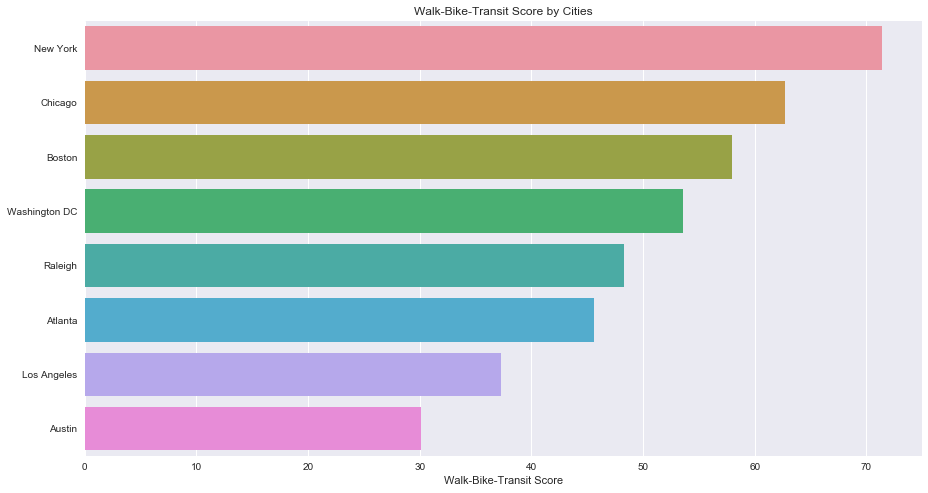

In [24]:
sns.set()
# amazon_city_group_mean.set_index('Amazon City').T.plot(kind='bar', stacked=True)
sns.set_context({"figure.figsize": (15, 8)})
bottom_plot = sns.barplot(x = amazon_city_group_mean['Score combined'], y = amazon_city_group_mean['Amazon City'], data = amazon_city_group_mean)
plt.title("Walk-Bike-Transit Score by Cities")
plt.xlabel("Walk-Bike-Transit Score")
plt.ylabel("")
plt.savefig('Walk-Bike-Transit Score Combined Graph')
plt.show()

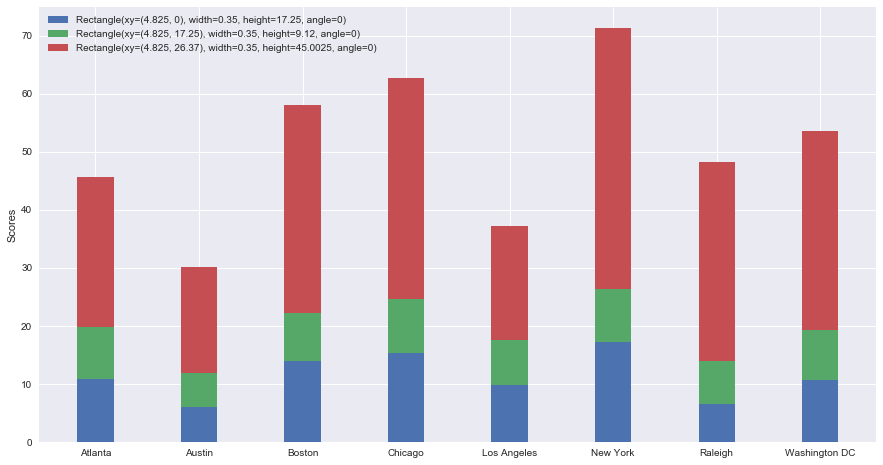

In [32]:
import numpy as np
import matplotlib.pyplot as plt


N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(amazon_city_group_mean['Amazon City'],amazon_city_group_mean['Walk score (Normalized)'], width)
p2 = plt.bar(amazon_city_group_mean['Amazon City'],amazon_city_group_mean['Bike score (Normalized)'], width,
             bottom=amazon_city_group_mean['Walk score (Normalized)'])
p3 = plt.bar( amazon_city_group_mean['Amazon City'],amazon_city_group_mean['Transit score (Normalized)'], width,
             bottom=amazon_city_group_mean['Bike score (Normalized)']+amazon_city_group_mean['Walk score (Normalized)'])

plt.ylabel('Scores')
plt.title('')
plt.legend((p1[0], p2[0], p3[0]))

plt.show()


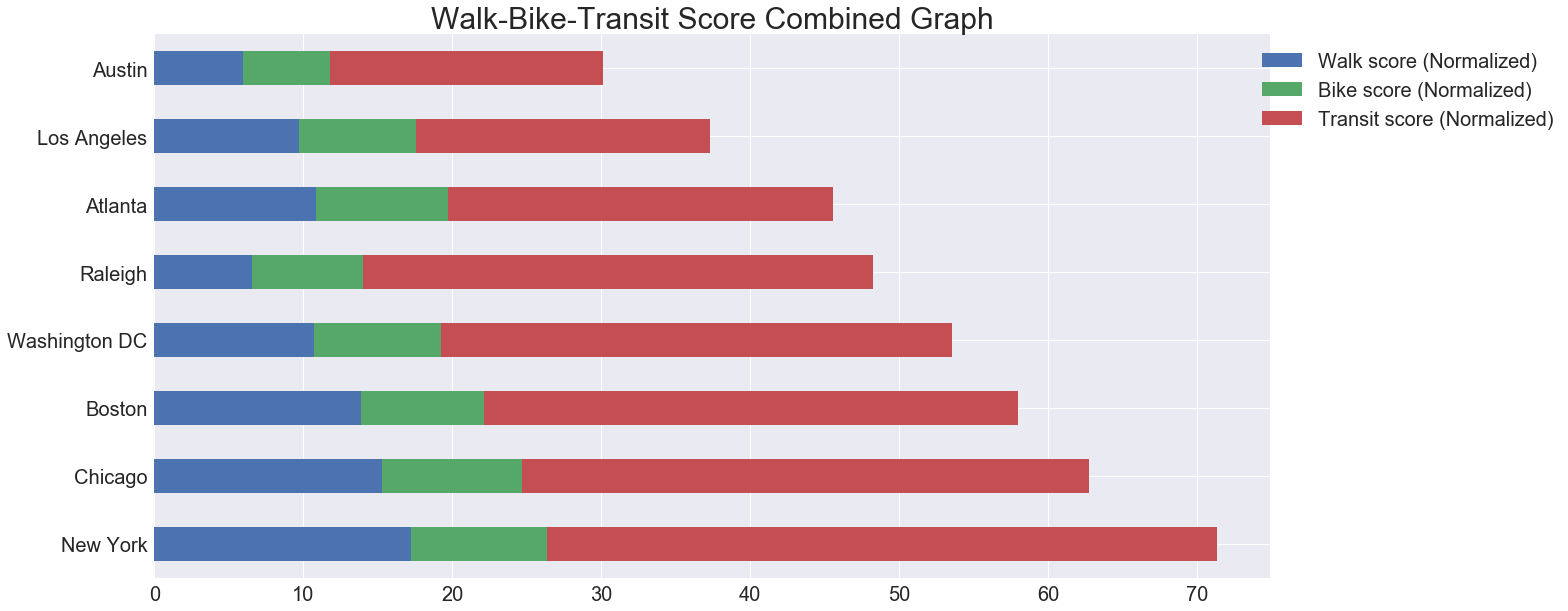

In [42]:
plt.figure(figsize=(12,6))
plot_group_score  =amazon_city_group_mean.loc[:,['Amazon City','Walk score (Normalized)','Bike score (Normalized)','Transit score (Normalized)']]
plot_group_score = plot_group_score.set_index('Amazon City')
plot_group_score.plot.barh(use_index = True,stacked=True,figsize=(20,10),fontsize = 20)
plt.legend(title = '', fontsize=20,bbox_to_anchor=(1.27, 1), ncol=1)

plt.title("Walk-Bike-Transit Score Combined Graph",fontsize = 30 )

plt.xlabel("")
plt.ylabel("")
plt.savefig('Walk-Bike-Transit Score by City.png', format='png')    

plt.show()